In [1]:
import numpy as np
import pandas as pd

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
#Importing dependencies
import sqlite3

In [4]:
#Connecting Database instance 
conn = sqlite3.connect('./database/delhi.sqlite')

In [5]:
#Creating the cursor
c = conn.cursor()

In [25]:
#Creating the DataFrame
query = c.execute("SELECT * From delhi_table;")
cols = [column[0] for column in query.description]
df= pd.DataFrame.from_records(data = query.fetchall(), columns = cols)

In [26]:
df

,datetime_utc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm
0,19961101-11:00,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4
1,19961101-16:00,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0
2,19961101-18:00,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,North,0.0
3,19961102-02:00,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,SSW,9.3
4,19961102-03:00,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,WSW,9.3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
80652,20170424-06:00,Haze,17.0,0,0,25.0,1005.0,0,0,34.0,0,0,4.0,320.0,NW,11.1
80653,20170424-09:00,Haze,14.0,0,0,16.0,1003.0,0,0,38.0,0,0,4.0,320.0,NW,22.2
80654,20170424-12:00,Haze,12.0,0,0,14.0,1002.0,0,0,36.0,0,0,4.0,270.0,West,18.5
80655,20170424-15:00,Haze,15.0,0,0,27.0,1004.0,0,0,32.0,0,0,2.0,320.0,NW,3.7


In [27]:
# Extracting the year 
def extract_year(value):
    return (value[0:4])
df["year"] = df["datetime_utc"].apply(lambda x:extract_year(x))

In [28]:
# Extracting month
def extract_month(value):
    return (value[4:6])
df["month"] = df["datetime_utc"].apply(lambda x:extract_month(x))

In [29]:
df.head()

,datetime_utc,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wdire,wspdm,year,month
0,19961101-11:00,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,West,7.4,1996,11
1,19961101-16:00,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,North,0.0,1996,11
2,19961101-18:00,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,North,0.0,1996,11
3,19961102-02:00,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,SSW,9.3,1996,11
4,19961102-03:00,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,WSW,9.3,1996,11


In [30]:
df.dtypes

datetime_utc     object
conds            object
dewptm          float64
fog               int64
hail              int64
hum             float64
pressurem       float64
rain              int64
snow              int64
tempm           float64
thunder           int64
tornado           int64
vism            float64
wdird           float64
wdire            object
wspdm           float64
year             object
month            object
dtype: object

In [31]:
# Dropping three columns 'datetime_utc', 'wdire', 'Unnamed: 0'
df = df.drop(['datetime_utc', 'wdire'], axis =1)
df.head()

,conds,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,year,month
0,Haze,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4,1996,11
1,Haze,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0,1996,11
2,Haze,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,0.0,1996,11
3,Haze,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,9.3,1996,11
4,Haze,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,9.3,1996,11


In [32]:
df.columns

Index(['conds', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wspdm', 'year',
       'month'],
      dtype='object')

In [33]:
ordered_columns = ['year','month', 'dewptm', 'fog', 'hail', 'hum', 'pressurem', 'rain', 'snow',
       'tempm', 'thunder', 'tornado', 'vism', 'wdird', 'wspdm', 'conds']
df = df[ordered_columns]

In [34]:
df.head()

,year,month,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm,conds
0,1996,11,9.0,0,0,27.0,1010.0,0,0,30.0,0,0,5.0,280.0,7.4,Haze
1,1996,11,11.0,0,0,47.0,1011.0,0,0,23.0,0,0,1.2,0.0,0.0,Haze
2,1996,11,13.0,0,0,60.0,1010.0,0,0,21.0,0,0,0.8,0.0,0.0,Haze
3,1996,11,10.0,0,0,52.0,1011.0,0,0,20.0,0,0,2.0,200.0,9.3,Haze
4,1996,11,10.0,0,0,46.0,1012.0,0,0,22.0,0,0,3.5,240.0,9.3,Haze


In [35]:
df.conds.value_counts()

Haze      65925
Rain       6022
Cloudy     5832
Clear      2878
Name: conds, dtype: int64

# Split the Data into Training and Testing

In [36]:
# Create our features
X = df.drop("conds", axis=1)

# Create our target
y = df["conds"]


In [37]:
X.describe()

,dewptm,fog,hail,hum,pressurem,rain,snow,tempm,thunder,tornado,vism,wdird,wspdm
count,80657.000000,80657.000000,80657.000000,80657.000000,8.065700e+04,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000,80657.000000
mean,15.676445,0.050907,0.000136,55.171926,2.199730e+03,0.027102,0.000012,26.340045,0.010216,0.000025,2.563318,169.093891,8.976131
std,7.150146,0.219809,0.011677,23.447379,3.558458e+05,0.162383,0.003521,8.242780,0.100558,0.004980,22.690289,118.166457,12.084670
min,-24.000000,0.000000,0.000000,4.000000,-9.999000e+03,0.000000,0.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,10.000000,0.000000,0.000000,36.000000,1.001000e+03,0.000000,0.000000,20.000000,0.000000,0.000000,1.800000,60.000000,3.700000
50%,15.000000,0.000000,0.000000,55.000000,1.008000e+03,0.000000,0.000000,28.000000,0.000000,0.000000,2.200000,170.000000,7.400000
75%,22.000000,0.000000,0.000000,74.000000,1.014000e+03,0.000000,0.000000,32.000000,0.000000,0.000000,3.000000,270.000000,13.000000
max,35.000000,1.000000,1.000000,100.000000,1.010614e+08,1.000000,1.000000,72.000000,1.000000,1.000000,6436.000000,960.000000,1514.900000


In [38]:
y.value_counts()

Haze      65925
Rain       6022
Cloudy     5832
Clear      2878
Name: conds, dtype: int64

In [39]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

# RandomOverSampler

In [40]:
# Resample the training data with the RandomOversampler
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
from collections import Counter
ros = RandomOverSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train, y_train)

Counter(y_resampled)

Counter({'Clear': 49517, 'Haze': 49517, 'Cloudy': 49517, 'Rain': 49517})

# LogisticRegression

In [47]:
# Train the Logistic Regression model using the resampled data
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='lbfgs', random_state=1)
model.fit(X_resampled, y_resampled)

LogisticRegression(random_state=1)

In [48]:
y_pred = model.predict(X_test)
y_pred

array(['Clear', 'Cloudy', 'Rain', ..., 'Haze', 'Haze', 'Rain'],
      dtype=object)

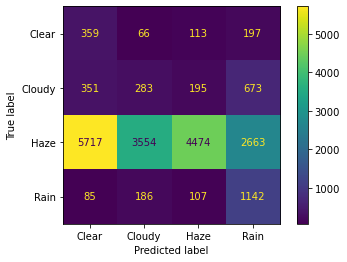

In [55]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [57]:
# Calulating the accuracy_score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.3103396974956608

In [58]:
# printing the classification report
from sklearn.metrics import classification_report
clf_report = (classification_report(y_test, y_pred))
print(clf_report)

              precision    recall  f1-score   support

       Clear       0.06      0.49      0.10       735
      Cloudy       0.07      0.19      0.10      1502
        Haze       0.92      0.27      0.42     16408
        Rain       0.24      0.75      0.37      1520

    accuracy                           0.31     20165
   macro avg       0.32      0.43      0.25     20165
weighted avg       0.77      0.31      0.38     20165



# DecisionTreeClassifier

In [59]:
from sklearn.tree import DecisionTreeClassifier
clf_model = DecisionTreeClassifier()

In [60]:
clf_model = clf_model.fit(X_train, y_train)
clf_model.score(X_train,y_train)

0.9991073199761952

In [61]:
clf_model.score(X_test,y_test)

0.9007686585668238

In [62]:
y_pred = clf_model.predict(X_test)
y_pred

array(['Haze', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

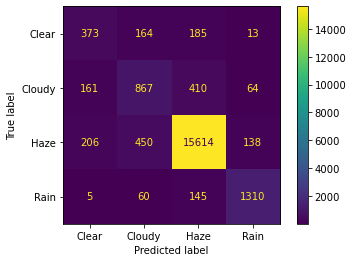

In [64]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [65]:
# Calulating the accuracy_score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.9007686585668238

In [66]:
# printing the classification report
from sklearn.metrics import classification_report
clf_report = (classification_report(y_test, y_pred))
print(clf_report)

              precision    recall  f1-score   support

       Clear       0.50      0.51      0.50       735
      Cloudy       0.56      0.58      0.57      1502
        Haze       0.95      0.95      0.95     16408
        Rain       0.86      0.86      0.86      1520

    accuracy                           0.90     20165
   macro avg       0.72      0.72      0.72     20165
weighted avg       0.90      0.90      0.90     20165



# RandomForestClassifier

In [67]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler().fit(X_train)
X_train_scaled = scaler.transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [68]:
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=1, n_estimators=500).fit(X_train_scaled, y_train)
print(f'Training Score: {clf.score(X_train_scaled, y_train)}')
print(f'Testing Score: {clf.score(X_test_scaled, y_test)}')

Training Score: 0.9991073199761952
Testing Score: 0.9342920902553931


In [69]:
y_pred = clf.predict(X_test_scaled)
y_pred

array(['Haze', 'Haze', 'Haze', ..., 'Haze', 'Haze', 'Haze'], dtype=object)

In [70]:
# Calulating the accuracy_score
from sklearn.metrics import accuracy_score
acc_score = accuracy_score(y_test, y_pred)
acc_score

0.9342920902553931

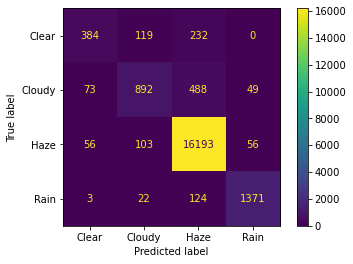

In [71]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [72]:
from sklearn.metrics import classification_report
clf_report = (classification_report(y_test, y_pred))
print(clf_report)

              precision    recall  f1-score   support

       Clear       0.74      0.52      0.61       735
      Cloudy       0.79      0.59      0.68      1502
        Haze       0.95      0.99      0.97     16408
        Rain       0.93      0.90      0.92      1520

    accuracy                           0.93     20165
   macro avg       0.85      0.75      0.79     20165
weighted avg       0.93      0.93      0.93     20165



# RandomUnderSampler

In [78]:
from imblearn.under_sampling import RandomUnderSampler
ros = RandomUnderSampler(random_state=1)
X_resampled, y_resampled = ros.fit_resample(X_train_scaled, y_train)
Counter(y_resampled)

Counter({'Clear': 2143, 'Cloudy': 2143, 'Haze': 2143, 'Rain': 2143})

In [79]:
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='newton-cg', random_state=1, max_iter=150)
model.fit(X_resampled, y_resampled)

LogisticRegression(max_iter=150, random_state=1, solver='newton-cg')

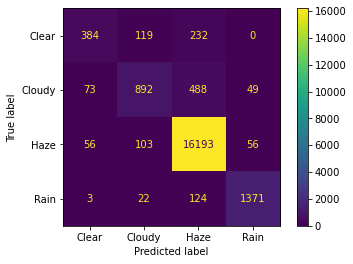

In [80]:
# Displaying the confusion_matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
disp.plot()

In [81]:
# Calculate the Balanced Accuracy Score
from sklearn.metrics import balanced_accuracy_score
balanced_accuracy_score(y_test, y_pred)

0.7512985332862608

In [82]:
# printing the classification report
from sklearn.metrics import classification_report
clf_report = (classification_report(y_test, y_pred))
print(clf_report)

              precision    recall  f1-score   support

       Clear       0.74      0.52      0.61       735
      Cloudy       0.79      0.59      0.68      1502
        Haze       0.95      0.99      0.97     16408
        Rain       0.93      0.90      0.92      1520

    accuracy                           0.93     20165
   macro avg       0.85      0.75      0.79     20165
weighted avg       0.93      0.93      0.93     20165

